In [5]:
import numpy as np
import pandas as pd
T_data = pd.read_csv('train.csv')
TT_data = pd.read_csv('test.csv')
t_id=T_data['PassengerId'].values
tt_id=TT_data['PassengerId'].values
all_df=T_data.append(TT_data).set_index('PassengerId')

In [6]:
all_df['Sex']

PassengerId
1         male
2       female
3       female
4       female
5         male
         ...  
1305      male
1306    female
1307      male
1308      male
1309      male
Name: Sex, Length: 1309, dtype: object

In [10]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

all_df = train_df.append(test_df).set_index('PassengerId')
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)
all_df["cabin_count"] = all_df["Cabin"].map(
         lambda x : len(x.split()) if type(x) == str else 0)
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))
all_df["social_status"].value_counts()
#all_df[all_df["Embarked"].isnull()]
all_df = all_df.drop([62,830])
train_id =np.delete(train_id, [62-1,830-1])
#all_df[all_df["Fare"].isnull()]
all_df.groupby(["Pclass","Sex"])["Fare"].mean()
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]
y = all_df.loc[train_id, "Survived"].values
del all_df["Survived"]
X_df = pd.get_dummies(all_df)
X = X_df.values
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)

In [11]:
y.shape,X.shape

((889,), (1307, 27))

In [12]:
t_x=X[:len(train_id)]
tt_x=X[len(train_id):]

<AxesSubplot:>

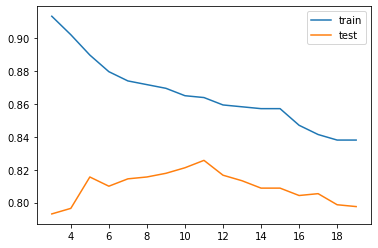

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
t_l=[]
tt_l=[]
for i in range(3,20):
    dt = DecisionTreeClassifier(min_samples_leaf=i)
    acc = cross_val_score(dt,t_x,y,scoring='accuracy',cv=5).mean()
    t_l.append(accuracy_score(dt.fit(t_x,y).predict(t_x),y))#오차율이 기록되었따.    
    tt_l.append(acc)
r=pd.DataFrame(t_l,index=range(3,20),columns=['train'])
r['test']=tt_l
r.plot()
               
            